# <center> ADAPTIVE COMPUTATION AND MACHINE LEARNING (COMS4030A)

## <center> Project: Customer Segmentation 
<center> Joshua Wacks  <center> Alex Vogt <center> Sonia Bullah

Add decription of project!

# Import and Preview Data

Add description about dataset

The following imported libraries will be used in the code:

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import missingno
from sklearn.preprocessing import LabelEncoder

It is necessary to import as well as preview the data provided by the dataset. This can be done as follows:

In [409]:
# First, we have to read in the dataset:
df = pd.read_csv("online_retail_II.csv")

# Show the first 5 entries of the dataset:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [410]:
# Show the last 5 entries of the dataset:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,12/9/2010 20:01,1.95,17530.0,United Kingdom


In [411]:
# Obtain information on each attribute of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [412]:
# Get the descriptive statistics of the dataset:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


Num values less than 0: 12326
Num values less than 0: 0
1566


C:\Users\User\AppData\Local\Temp/ipykernel_16804/633240152.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'][df['Quantity'] <0]=np.nan


<AxesSubplot:>

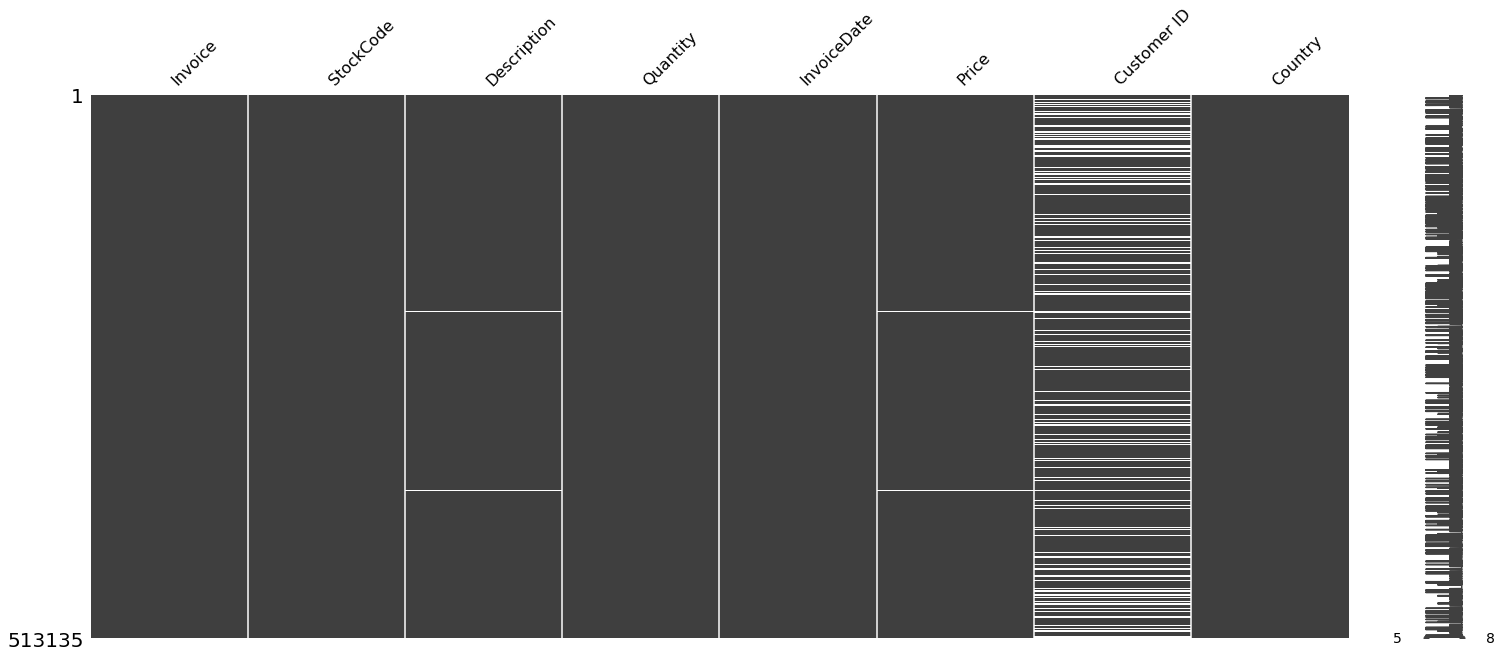

In [413]:
# Check to see if there are any missing values in the dataset:
#df['Price'].isnull().values.any()
df = df.replace(0,np.nan)
print("Num values less than 0:",len(np.where(df['Quantity'] <0)[0]))
#df['Quantity'] = df['Quantity'].abs()
df['Quantity'][df['Quantity'] <0]=np.nan
df = df[df['Quantity'].notna()] 
print("Num values less than 0:",len(np.where(df['Quantity'] <0)[0]))
print(df['Price'].isna().sum())
missingno.matrix(df)

Therefore, there are some missing values in the dataset. Let's find out which columns contain these null values.

In [414]:
# Find out which columns contain null values:
print((df[['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']].isna()).sum())

Invoice             0
StockCode           0
Description      1101
Quantity            0
InvoiceDate         0
Price            1566
Customer ID    105440
Country             0
dtype: int64


In [415]:
print("percentage of null prices",(df['Price'].isna().sum())/len(df))

percentage of null prices 0.003051828466193107


Num values less than 0: 3
Num values less than 0: 0
       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1       489434    79323P                   PINK CHERRY LIGHTS      12.0   
2       489434    79323W                  WHITE CHERRY LIGHTS      12.0   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE       2.0   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL       1.0   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL       1.0   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG       2.0   
525460  538171     21931               JUMBO STORAGE BAG SUKI       2.0   

            InvoiceDate  Price  Customer ID    

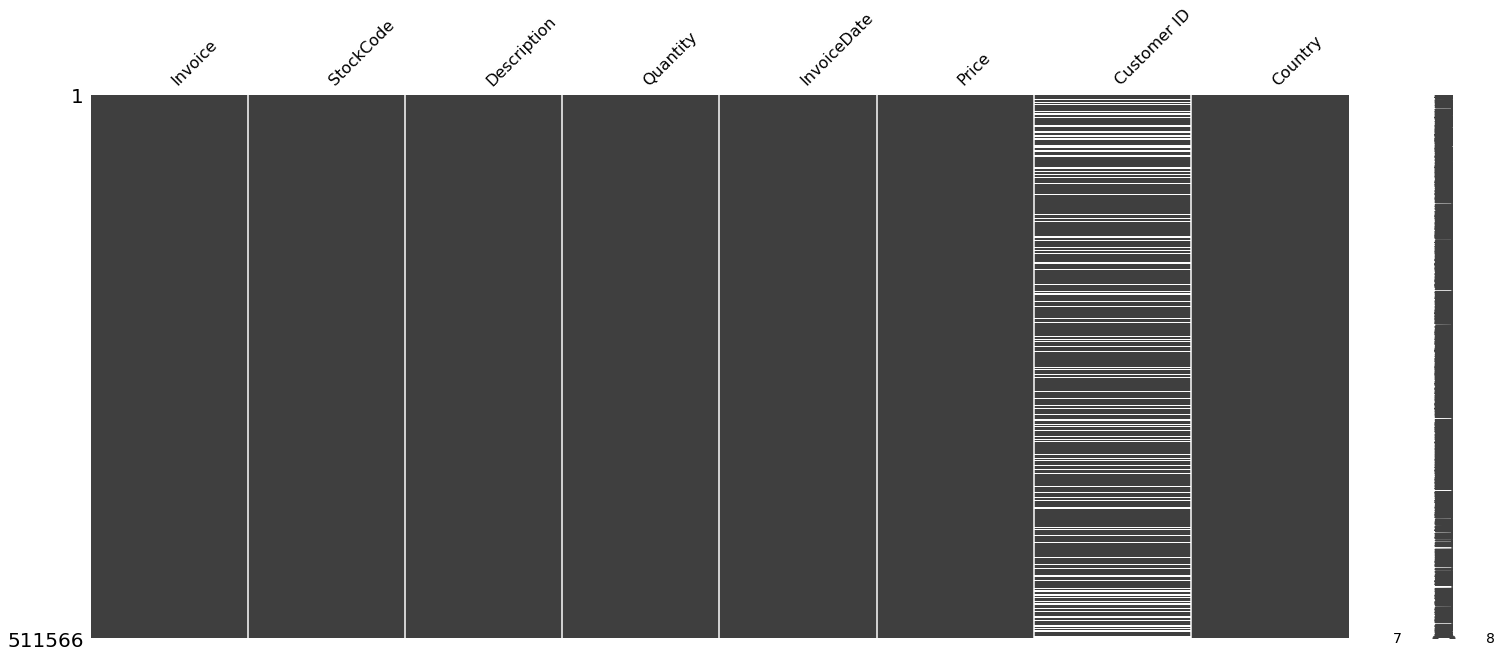

In [416]:
# Drop rows with missing values for price:
print("Num values less than 0:",len(np.where(df['Price'] <0)[0]))
df['Price'][df['Price'] <0]=np.nan
df = df[df['Price'].notna()] 
print("Num values less than 0:",len(np.where(df['Price'] <0)[0]))
print(df)
missingno.matrix(df)
#condition = df.index(df[df['Price']<0.0])
#df.drop(condition,inplace=True)
#print(df)
#missingno.matrix(df)
#df.drop(df['Price'],axis =1,inplace=True).isna().all(1)
#df['Price'].dropna(inplace=True)
#print((df['Price'].isna().sum())/len(df))
print((df['Customer ID'].isna().sum())/len(df))

# Let's see if all the null vales have been removed:
print((df[['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']].isna().sum()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      407664 non-null  object 
 1   StockCode    407664 non-null  object 
 2   Description  407664 non-null  object 
 3   Quantity     407664 non-null  float64
 4   InvoiceDate  407664 non-null  object 
 5   Price        407664 non-null  float64
 6   Customer ID  407664 non-null  float64
 7   Country      407664 non-null  object 
dtypes: float64(3), object(5)
memory usage: 28.0+ MB


<AxesSubplot:>

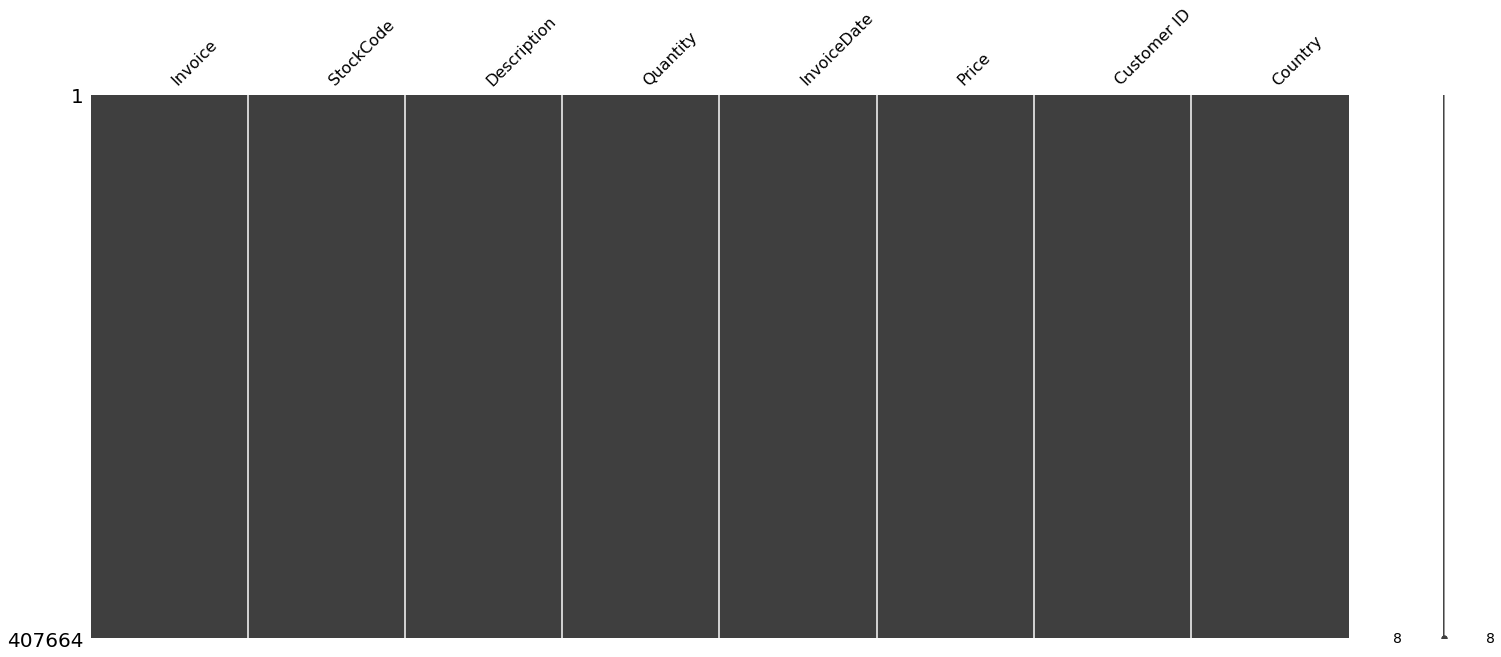

In [417]:
df = df[df['Customer ID'].notna()]
df.info() 
missingno.matrix(df)

In [418]:
#convert to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  object        
 1   StockCode    407664 non-null  object        
 2   Description  407664 non-null  object        
 3   Quantity     407664 non-null  float64       
 4   InvoiceDate  407664 non-null  datetime64[ns]
 5   Price        407664 non-null  float64       
 6   Customer ID  407664 non-null  float64       
 7   Country      407664 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 28.0+ MB


In [419]:
#label encoding for non numeric features
df['Country'].value_counts()
df['Country'] = df['Country'].astype('category').cat.codes
df['Invoice'] = df['Invoice'].astype('category').cat.codes
df['StockCode'] = df['StockCode'].astype('category').cat.codes
df['Description'] = df['Description'].astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  int16         
 1   StockCode    407664 non-null  int16         
 2   Description  407664 non-null  int16         
 3   Quantity     407664 non-null  float64       
 4   InvoiceDate  407664 non-null  datetime64[ns]
 5   Price        407664 non-null  float64       
 6   Customer ID  407664 non-null  float64       
 7   Country      407664 non-null  int8          
dtypes: datetime64[ns](1), float64(3), int16(3), int8(1)
memory usage: 18.3 MB


Now that the data has been imported and previewed, we can visualise the data by adding the following two lines to the code:

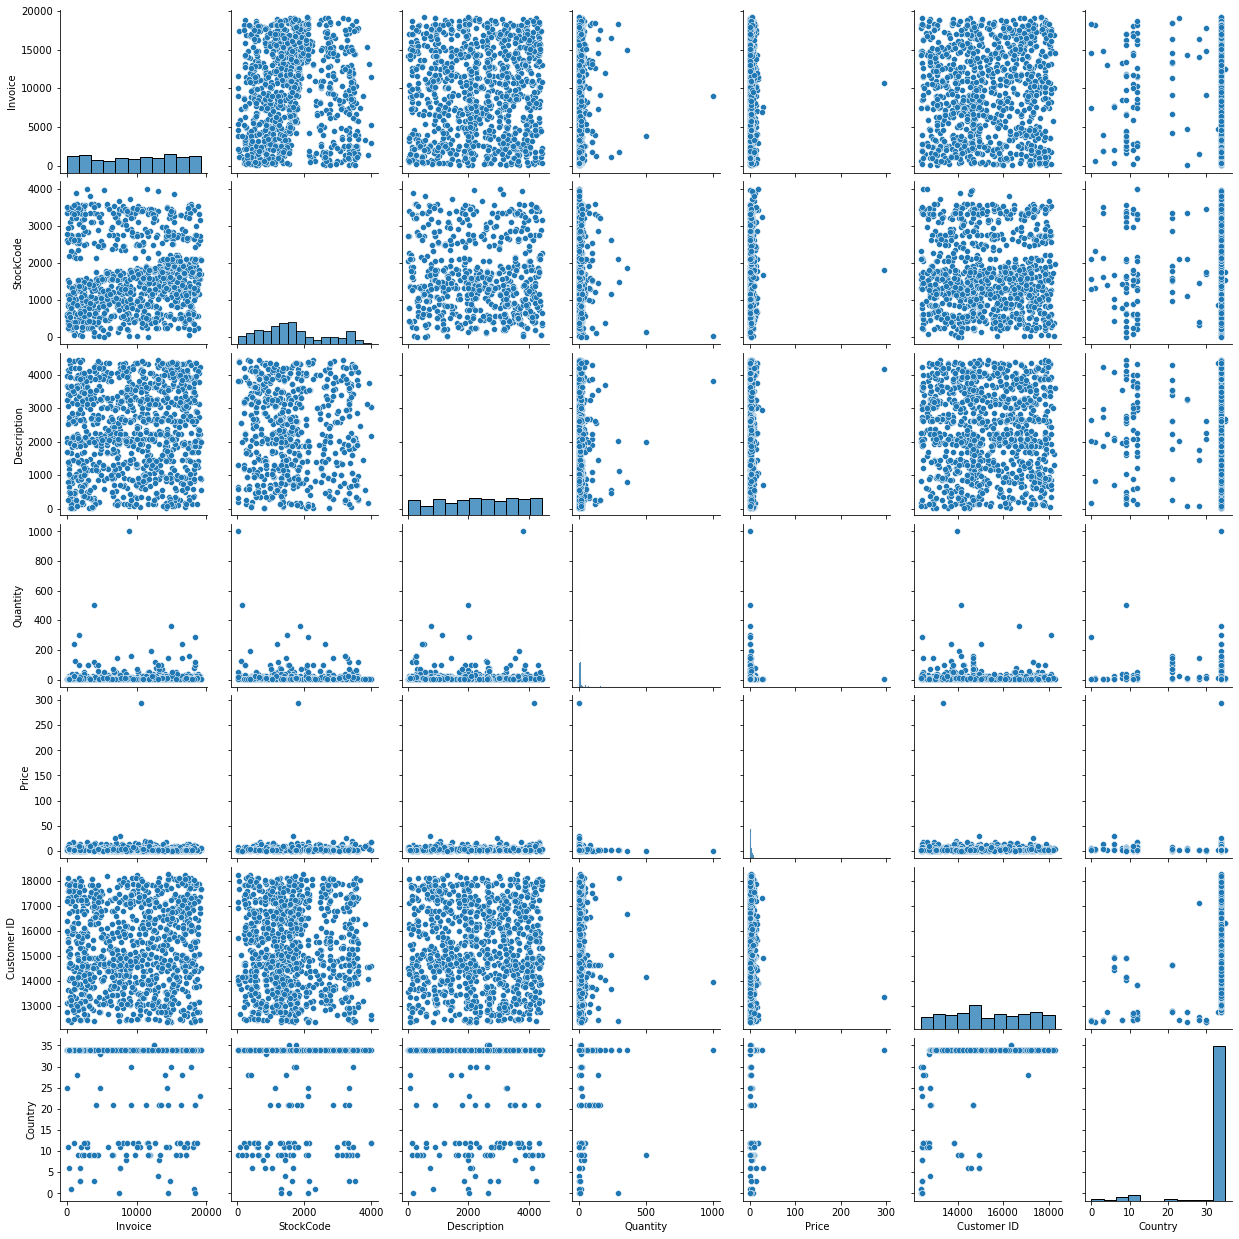

In [422]:
sampledf = df.sample(n =1000)
sns.pairplot(sampledf)
plt.show()